# *Algorithme Evolutionnaires* 

#### Travaux dirigés N°1 : *MaxOne*

<p style = "text-align:center;
            font-weight:bold ">Résumé</p>
On va coder en Python un algorithme génetique simple pour résoudre le problème dit *MaxOne*

## 1.  Introduction

Le problème dit "MaxOne" est un problème jouet, qui consiste à maximiser le nombre de "1" dans une chaine de chiffre binaire de longueur $n$. Bien evidement nous connaissons la solution à l'avance ( c'est la chaine 1.1.1.1......1), mais nous souhaitons que l'algorithme génétique le découvre tout seul, en ayant comme seul indice une fonction de $fitness$ qui renvoie le nombre de "1" dans une solution candidate. 

#### Librairie

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

1. Codez la fonction qui réalise l'*opérateur de mutation*, qui prend un individu en entrée et inverse chacun des ses "gènes" avec une probabilité **PMUT**

**fonction de mutation**

In [2]:
''' arg : liste de int (genes d'un individu) '''

''' Probabilité de mutation PMUT'''
PMUT = 0.01

''' Fonction '''
def mutation(arg, PMUT=0.01):
    global nbr_mutation
    global result
    global idx
    
    npinput = np.array(arg)
    arg = np.array(arg)
    N = np.shape(npinput)
    idx = []
    
    for i in range(0,N[0]):
        prob = random.random()
        if prob < PMUT:
            #print('mutation')
            idx.append(i)
            if arg[i] == 1:
                arg[i] = 0
            else:
                arg[i] = 1 
    result = arg
    nbr_mutation = np.sum(npinput != arg)   
    return result, nbr_mutation, idx

nombre de mutation sur le gene n° 1 : 1 
 indice : [10] 
 gene muté : [1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0] 
gene d'origine : [1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0]
nombre de mutation sur le gene n° 14 : 1 
 indice : [8] 
 gene muté : [0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1] 
gene d'origine : [0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1]
nombre de mutation sur le gene n° 28 : 1 
 indice : [7] 
 gene muté : [1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1] 
gene d'origine : [1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1]
nombre de mutation sur le gene n° 29 : 1 
 indice : [7] 
 gene muté : [1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0] 
gene d'origine : [1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
nombre de mutation sur le gene n° 31 : 1 
 indice : [7] 
 gene muté : [0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1] 
gene d'origine : [0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
nombre de mutation sur le gene n° 46 : 1 
 indice : [7] 
 gene muté : [1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1] 
gene d'origine : [1 1 0 0 1

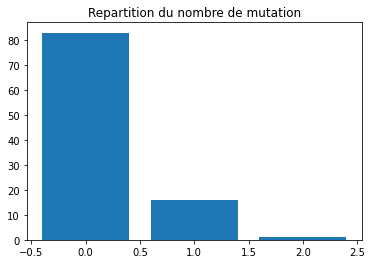

In [3]:
''' Test mutation fonction ''' 

''' Générer les données de test'''
POPSIZE = 100 # La taille de la population
N = 20 # taille de l'ensemble A 
pop = np.random.choice([0,1], [POPSIZE,N])

mutation_history = []

for i in range(0,POPSIZE):
    mutation(pop[i])
    mutation_history.append(nbr_mutation)
    if nbr_mutation != 0:
        print("nombre de mutation sur le gene n°", i, ":", nbr_mutation, "\n",
          "indice :",idx,"\n",
          "gene muté :", result,"\n"
          "gene d'origine :", pop[i])

label = np.unique(mutation_history)
values = np.unique(mutation_history, return_counts=True)[1]

import matplotlib.pyplot as plt
plt.bar(label, values)
plt.title("Repartition du nombre de mutation")
plt.show()


2. Codez la fonction qui réalise l'opérateur de croisement, qui prend deux individus en entrée, choisit un point de croisement au hasard et échange les deux sous-chaînes à sa droite

**fonction : operateur de croisement**

In [4]:
''' arg1, arg2 :  genes d'un individu '''

''' probabilité d'une recombination '''
PX = 0.6

''' Function '''
def crossover(arg1, arg2, PX=0.6,comment=False):
    prob = random.random()
    if prob < PX:
        cross_point = np.random.choice(np.arange(0,len(arg1)))
        tmp = arg1[cross_point]
        tmp2 = arg2[cross_point]
        arg1[cross_point] = tmp2
        arg2[cross_point] = tmp
        if comment == True:
            print("mutation TRUE")
            print("Changement de gene en :", cross_point, "\n")
            print("input1 : ", arg1)
            print("input2 : ", arg2)
        return arg1, arg2
    else :
        if comment == True:
            print("mutation FALSE")
            print("input1 : ", arg1)
            print("input2 : ", arg2)
        return arg1, arg2

In [5]:
''' Test recombination '''

''' Générer les données de test'''
POPSIZE = 100 # La taille de la population
N = 20 # la taille de longueur de l'ensemble A
pop = np.random.choice([0,1], [POPSIZE,N])

print("input1 :", pop[1])
print("input2 :", pop[2], "\n")

 
tmp = crossover(pop[1], pop[2], comment = True)

input1 : [1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0]
input2 : [0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0] 

mutation FALSE
input1 :  [1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0]
input2 :  [0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0]


3. Codez la fonction $fitness$, quiprends un individu en entrée et renvoie le nombre de $"1"$ qu'il contient.

**fonction de fitness**

In [6]:
''' arg : sequence de gene  '''
def fitness(arg):
    return np.sum(arg)    

In [7]:
''' Test fitness function '''

''' Générer les données de test'''
POPSIZE = 100 # La taille de la population
N = 20 # la longueur d'un génome
pop = np.random.choice([0,1], [POPSIZE,N])

print(fitness(pop[1]))
print(pop[1])

12
[1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0]


4. Codez la fonction qui réalise l'opérateur de sélection. ( selection par rang)

**Operateur de selection par rang**


In [8]:
def selection(data):
    global boot
    global cum_fitness_max
    global cum_fitness_min
    global selectionindiv
    global value 

    data = np.array(data)
    fitness = np.sum(data, axis=1)
    fitness_cum = np.cumsum(fitness)
    selectionindiv = np.random.choice(fitness_cum)
    
    '''
    data = np.concatenate((data,
                           np.reshape(fitness,(-1,1)),
                           np.reshape(fitness_cum,(-1,1))),
                          axis=1)
    '''
    value = np.arange(0,np.max(fitness_cum))
    selectionindiv = np.random.choice(value)

    for i in np.arange(0,np.shape(data)[0]-1):
        if fitness_cum[i+1] > selectionindiv and fitness_cum[i-1] < selectionindiv:
            cum_fitness_max = i+1
            cum_fitness_min = i-1
            
            if fitness[cum_fitness_max] > fitness[cum_fitness_min]:
                boot = data[cum_fitness_max]
                
            else :
                boot = data[cum_fitness_min]
    return boot
        
                
            
    
    

In [9]:
''' Générer les données de test'''
POPSIZE = 100 # La taille de la population
N = 20 # la longueur d'un génome
pop = np.random.choice([0,1], [POPSIZE,N])

### Evolutionnary Algorithm

In [10]:
'''Nombre maximum de générations '''
MAXGEN = 100 

''' La taille de la population '''
POPSIZE = 100 

''' la longueur d'un génome '''
N = 20 

''' probabilité d'une mutation '''
PMUT = 0.01 

''' probabilité d'une recombination'''
PX = 0.6 

pop = np.random.choice([0,1], [POPSIZE,N])
print("pop shape :", np.shape(pop))

''''
print("pop : \n",
      "nombre d'individus :", np.shape(pop)[0],"\n",
      "taille des genes :",np.shape(pop)[1])
'''

'''
print("Samples : \n",
      "sample n°",i,"\n",
      " gene :", pop[i])
'''

''' boucle simulant le nombre de generation'''
for i in range(MAXGEN):
    ''' block d'instruction qui effectue la selection '''
    new_pop = selection(pop) # selectionne un individu aleatoirement 
    for j in np.arange(0,POPSIZE-1):
        new_indiv = selection(pop)
        new_pop = np.vstack([new_pop, new_indiv] )
   # print("new_pop shape :", np.shape(new_pop))
    
    for m in np.arange(0,POPSIZE-1):
        tmp = mutation(new_pop[m])
       # print("tmp",tmp)
        new_pop[m] = tmp[0]
        
    for n in np.arange(0, POPSIZE-1,2):
        tmp = crossover(new_pop[n], new_pop[n+1])
        new_pop[n] = tmp[0]
        new_pop[n+1] = tmp[1]

            

        
        

pop shape : (100, 20)


In [11]:

def AlgoEvol(pmut=0.01, px=0.6):
    '''Nombre maximum de générations '''
    MAXGEN = 100 

    ''' La taille de la population '''
    POPSIZE = 100 

    ''' la longueur d'un génome '''
    N = 20

    ''' probabilité d'une mutation '''
     

    ''' probabilité d'une recombination'''
    PX = 0.6 
    global pop
    global best_solution
    pop = np.random.choice([0,1], [POPSIZE,N])
    #print("pop shape :", np.shape(pop))

    global fitness_max_history
    fitness_max_history = []
    for i in range(MAXGEN):

        ''' block d'instruction qui effectue la selection '''
        new_pop = selection(pop) # selectionne un individu aleatoirement 
        for j in np.arange(0,POPSIZE-1):
            new_indiv = selection(pop)
            new_pop = np.vstack([new_pop, new_indiv] )
    # print("new_pop shape :", np.shape(new_pop))
        fitness = np.sum(new_pop, axis=1)
        fitness_cum = np.cumsum(fitness)
        # print("fitness cumulative generation n°",i,np.max(fitness_cum))
        fitness_max_history.append(np.max(fitness_cum))

        for m in np.arange(0,POPSIZE-1):
            tmp = mutation(new_pop[m], PMUT=pmut)
        # print("tmp",tmp)
            new_pop[m] = tmp[0]
            
        for n in np.arange(0, POPSIZE-1,2):
            tmp = crossover(new_pop[n], new_pop[n+1], PX=px)
            new_pop[n] = tmp[0]
            new_pop[n+1] = tmp[1]

        pop = new_pop

    return fitness_max_history


### Experiences

**Teste de l'AlgoEvol() avec différentes probabilités de mutation des gènes**

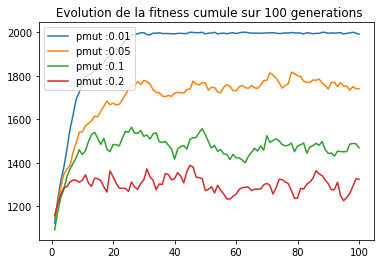

In [12]:
import matplotlib.pyplot as plt

parametres = [0.01, 0.05, 0.1, 0.2]

values = np.arange(1,101,1)
for i in parametres:
    evolution = AlgoEvol(pmut=i)
    d = "pmut :"+str(i)
    plt.plot(values, fitness_max_history, label =d)
    plt.legend()

plt.title(" Evolution de la fitness cumule sur 100 generations")
plt.show()

**Observation**
 
On observe que la fréquence de mutation a un impact sur la convergence de la solution. En effet, on peut observer que pour une probabilité de mutation élevé, la population ne va pas tendre en intégralité vers la solution optimale. 


**Teste de l'AlgoEvol() avec différentes probabilité de recombinaison des gènes**

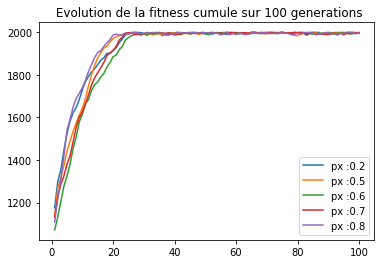

In [13]:
import matplotlib.pyplot as plt

parametres = [0.2,0.5, 0.6, 0.7, 0.8]

values = np.arange(1,101,1)
for i in parametres:
    evolution = AlgoEvol(px=i)
    d = "px :"+str(i)
    plt.plot(values, fitness_max_history, label =d)
    plt.legend()

plt.title(" Evolution de la fitness cumule sur 100 generations")
plt.show()

**Observation:**

On peut observer que la probabilité de recombinaison des gènes n'a pas autant d'impact que l'opérateur de mutation de gène. Dans ce cas de figure, on peut remarquer que, lorsque la probilité de recombinaison est élevé, la population converge legerement plus vite vers la solution.